In [3]:
import numpy as np, healpy as hp, curvedsky, prjlib, plottools as pl, binning as bn
from matplotlib.pyplot import *

In [4]:
#datas = ['nilc','smica']
datas = ['nilc']

In [9]:
dold = prjlib.data_directory()['cmb']
Dold = '/global/homes/t/toshiyan/scratch/PLKold/aps/'
cl, CL = {}, {}
for d in datas:
    p = prjlib.init_analysis(wtype='LmaskN18',ascale=1.0,dtype='dr2_'+d)
    #L, CL['r',d] = np.loadtxt(dold+'N18/aps_obs_1d_'+d+'_Lmask1.dat',usecols=(0,1),unpack=True)
    L, CL['r',d] = np.loadtxt(Dold+'aps_obs_1d_'+d+'_Lmask1.dat',usecols=(0,1),unpack=True)
    #L, CL['s',d], CL['n',d], CL['p',d], CL['c',d] = np.loadtxt(dold+'N18/aps_sim_1d_'+d+'_Lmask1.dat',usecols=(0,1,2,3,4),unpack=True)
    L, CL['s',d], CL['n',d], CL['p',d], CL['c',d] = np.loadtxt(Dold+'aps_sim_1d_'+d+'_Lmask1.dat',usecols=(0,1,2,3,4),unpack=True)
    l, cl['r',d] = np.loadtxt(p.fcmb.cl[0],unpack=True,usecols=(0,1))
    l, cl['s',d], cl['n',d], cl['p',d], cl['c',d] = np.loadtxt(p.fcmb.scl,unpack=True,usecols=(0,1,2,3,4))

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


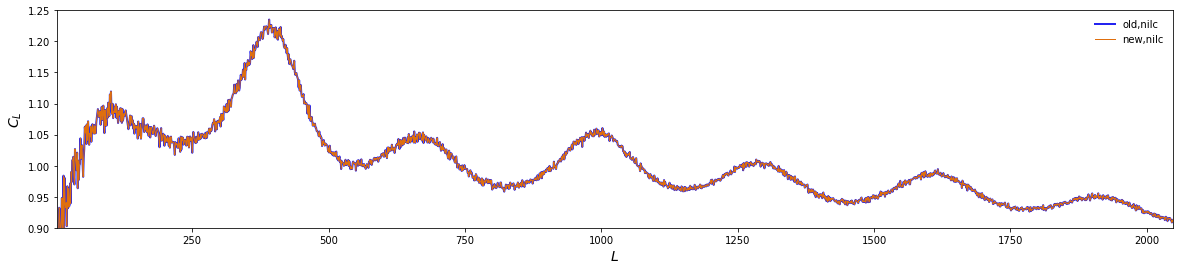

In [10]:
for d in datas:
    pl.plot_1dstyle(fsize=[20,4],ymin=0.9,ymax=1.25,xmin=2,xmax=2048)
    plot(l[1:],CL['s',d][:2048]/p.lcl[0][1:],label='old,'+d,lw=2)
    plot(l[1:],cl['s',d][1:]/p.lcl[0][1:],label='new,'+d,lw=1)
    legend()
    show()

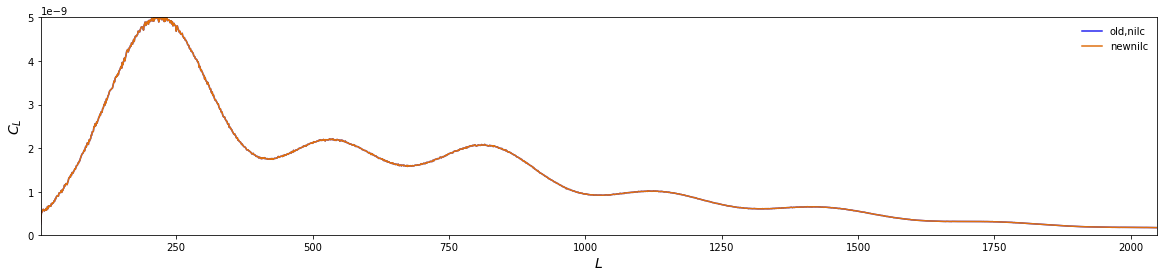

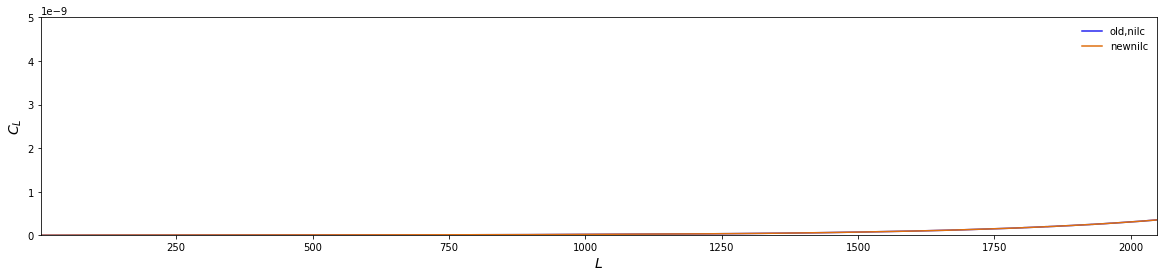

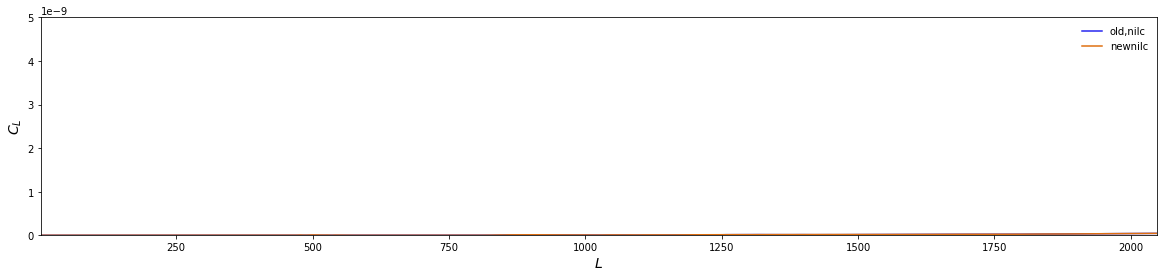

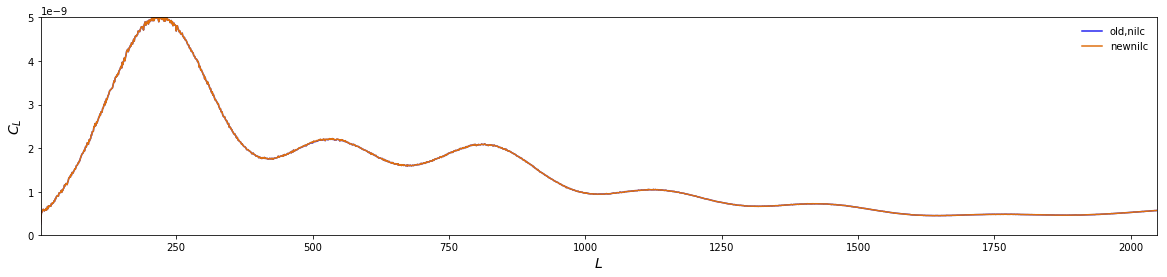

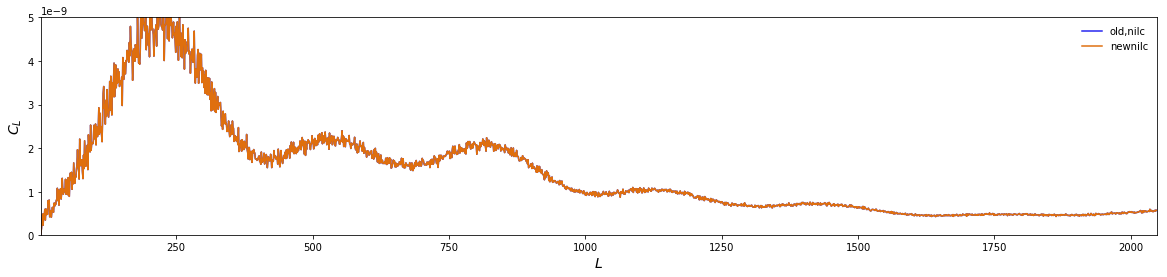

In [11]:
for d in datas:
    for s in ['s','n','p','c','r']:
        pl.plot_1dstyle(fsize=[20,4],ymin=1e-11,ymax=5e-9,xmin=2,xmax=2048)
        plot(L,L**2*CL[s,d],label='old,'+d)
        plot(l,l**2*cl[s,d],label='new'+d)
        legend()
        show()

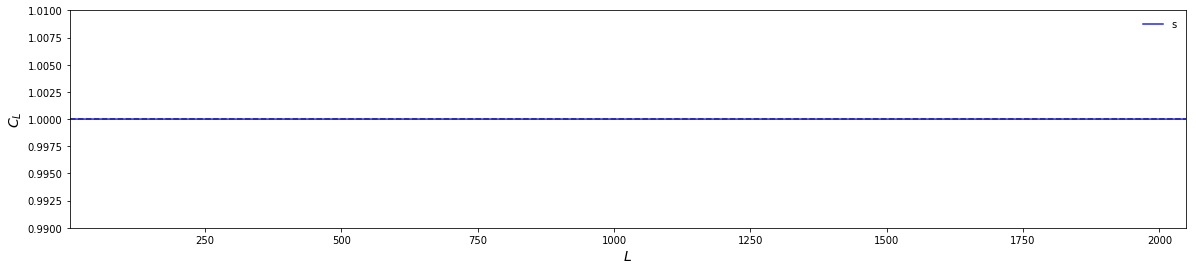

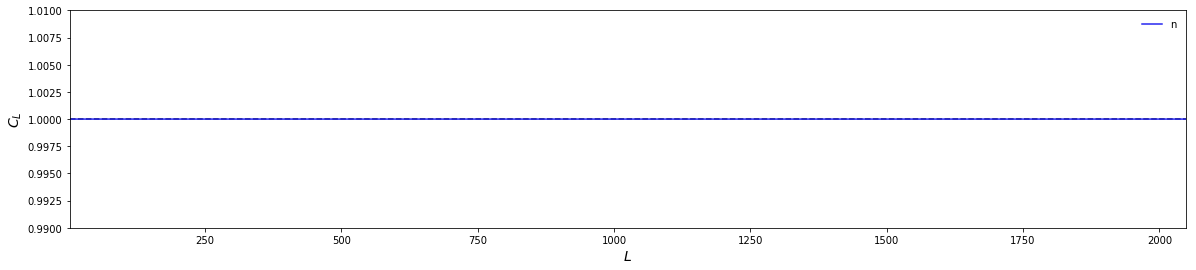

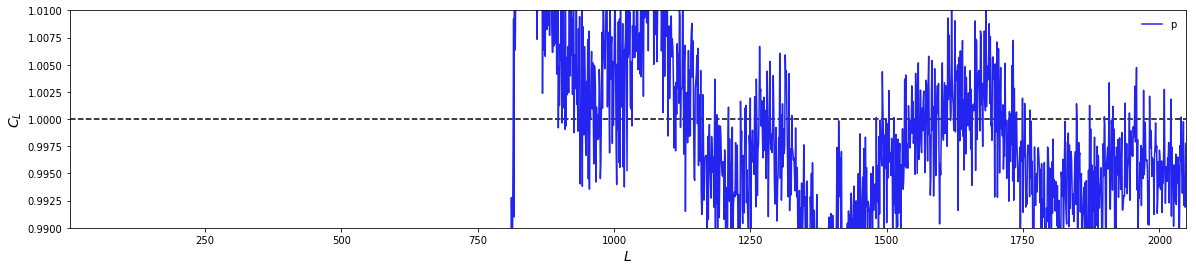

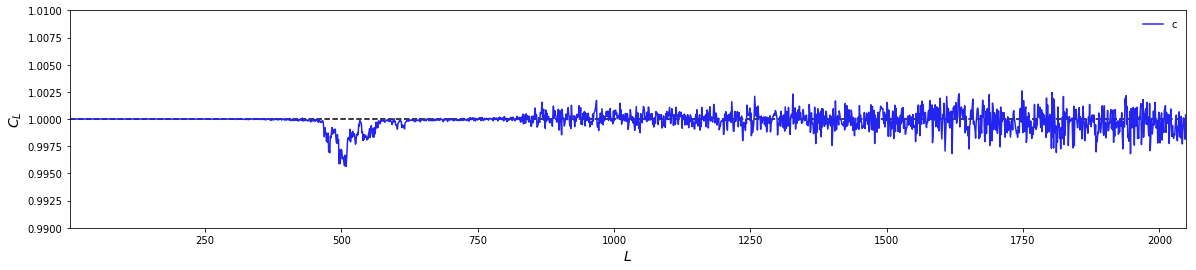

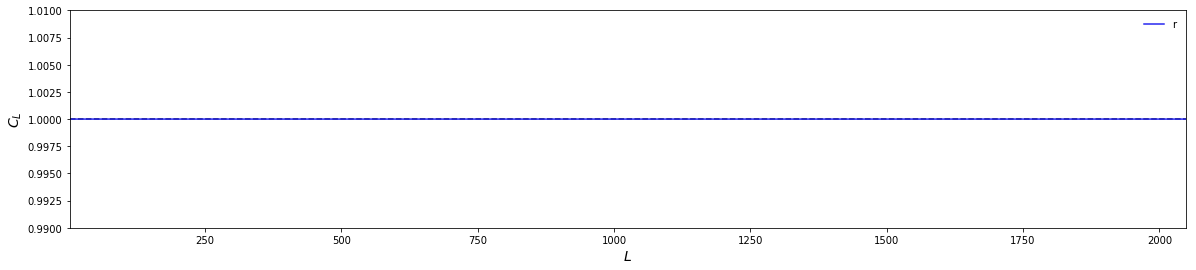

In [13]:
for d in datas:
    for s in ['s','n','p','c','r']:
        pl.plot_1dstyle(fsize=[20,4],ymin=0.99,ymax=1.01,xmin=2,xmax=2048)
        axhline(1,color='k',ls='--')
        plot(l[1:],CL[s,d][0:p.lmax]/cl[s,d][1:],label=s)
        legend()
        show()

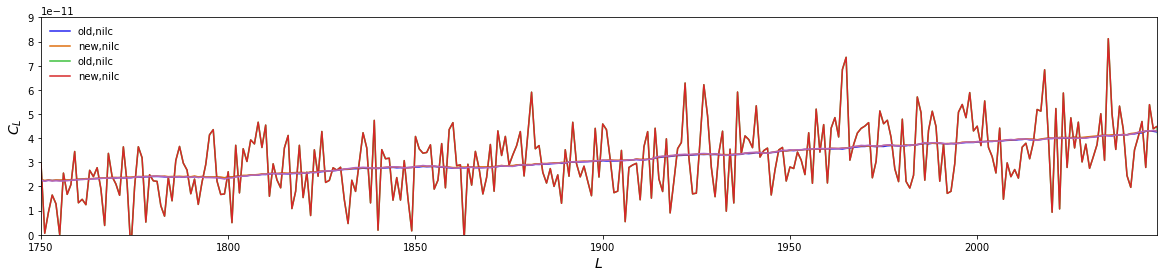

In [7]:
Lp, Ptsr = np.loadtxt(dold+'N18/ptsr_nilc_Lmask1.dat',unpack=True,usecols=(0,1))
lp, ptsr = np.loadtxt(p.fptsrcl,unpack=True,usecols=(0,1))
for d in datas:
    for s in ['p']:
        pl.plot_1dstyle(fsize=[20,4],ymin=1e-15,ymax=9e-11,xmin=1750,xmax=2048)
        plot(L,L**2*CL[s,d],label='old,'+d)
        plot(l,l**2*cl[s,d],label='new,'+d)
        plot(L,L**2*(CL['r',d]-CL['s',d]-CL['n',d]),label='old,'+d)
        plot(l,l**2*(cl['r',d]-cl['s',d]-cl['n',d]),label='new,'+d)
        plot(lp,lp**2*ptsr)
        legend()
        show()